In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
import random
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

from matplotlib.backends.backend_pdf import PdfPages

In [191]:
random.seed(1234567)
mu, sigma = 0, 7 # mean and standard deviation
e = np.random.normal(mu, sigma, 25) #noise from guassian distribution

#constant
a0 = 2

#coeffients
a1 = -3
a2 = 1
a3 = 5
a4 = -8
a5 = 3
a6 = 5
a7 = 1
a8 = -2
a9 = -5

#variable(linspace (start, stop, numb of items to generate))
x = np.linspace(0, 2, 25)

In [192]:
#list of parameters, degrees and others
parameters = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9] 

degree = [0, 1, 2, 3, 4, 5, 7, 10, 15, 30]

aic_list = []
aic_test = []
bic_list = []
mse_list = []
ypred_list = []
num_params_list = []
yy_list = []

In [193]:
#Function to make the generating data process iterative
def generate_data(length, order):
    if order > len(parameters):
        raise ValueError("I don't have enough parameters for that!")
        
    p = parameters[:order]
    y = np.zeros(length)
    
    for i in range(len(p)):
        y += p[i] * x ** i
        
    y += e
    return y 

In [194]:
#generate cubic data 
y = generate_data(25, 4)

In [195]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic
 
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

def train_polynomial_model(x, y, degree):
    lin_reg = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = lin_reg.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    ypred_list.append(y_pred)
    num_params = len(model.coef_) + 1
    num_params_list.append(num_params)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)
    aic = calculate_aic(len(y), mse, num_params)
    aic_list.append(aic)
    print('AIC: %.3f' % aic)
    # calculate the bic
    bic = calculate_bic(len(y), mse, num_params)
    bic_list.append(bic)
    print('BIC: %.3f' % bic)
    resid = y - y_pred
    sse = sum(resid**2)
    aic_t= 2 * num_params - 2 * log(sse)
    aic_test.append(aic_t)
    return y_pred

def print_stats(y, train_model):
    print('r2: {}'.format(r2_score(y, train_model)))
    print('MSE: {}'.format(mse(y, train_model)))

def plot_model(x, y, train_model):
    plt.figure(figsize =(15,10))
    plt.title('Line of Best Fit')
    plt.scatter(x, y)
    plt.plot(x, train_model)
    plt.show()
    plt.savefig('fig.jpg')


AIC: 137.943
BIC: 140.381
r2: 0.0
MSE: 212.24468032987238


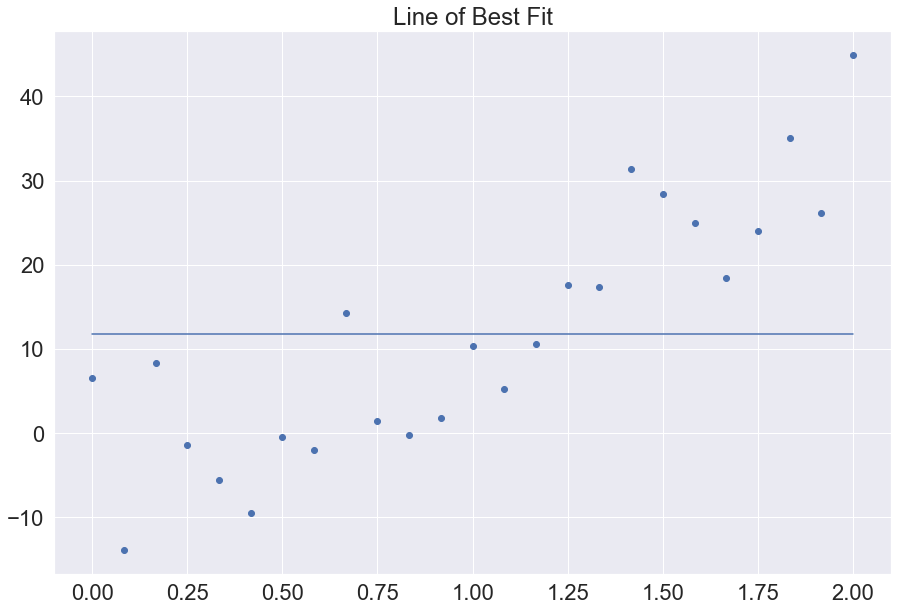

AIC: 106.474
BIC: 110.131
r2: 0.7378329837248205
MSE: 55.643554562361906


<Figure size 432x288 with 0 Axes>

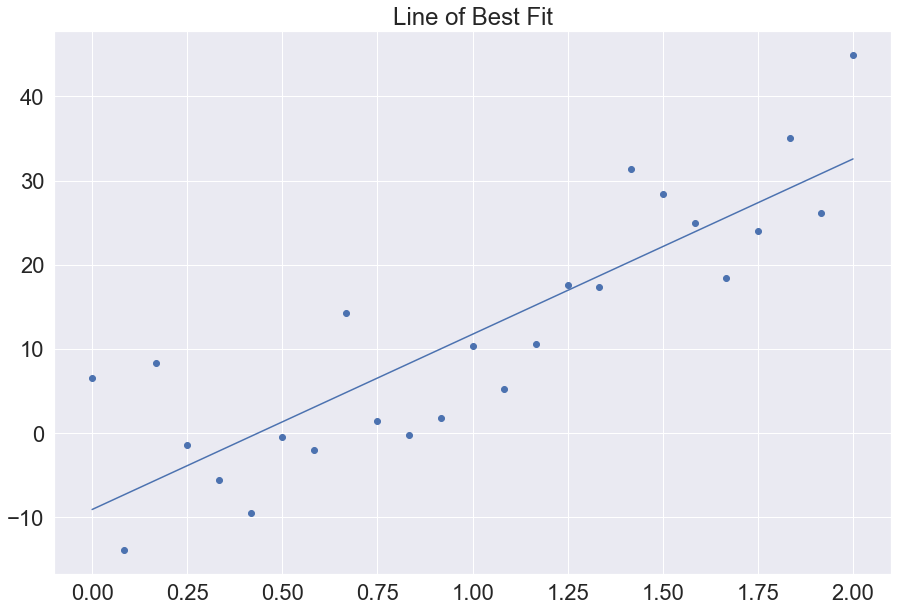

AIC: 102.985
BIC: 107.860
r2: 0.7895179704715145
MSE: 44.673691072456165


<Figure size 432x288 with 0 Axes>

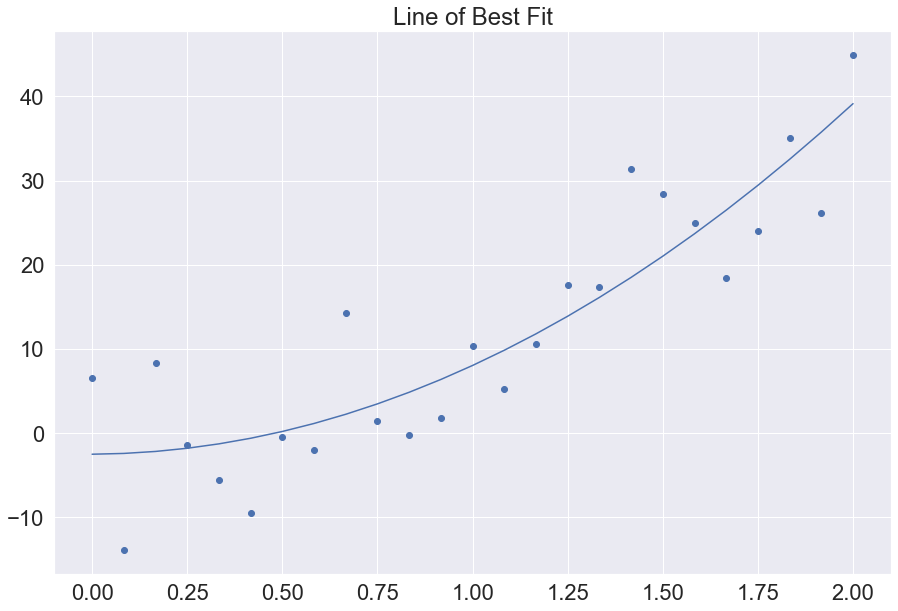

AIC: 103.753
BIC: 109.847
r2: 0.7996386884006998
MSE: 42.52562253086742


<Figure size 432x288 with 0 Axes>

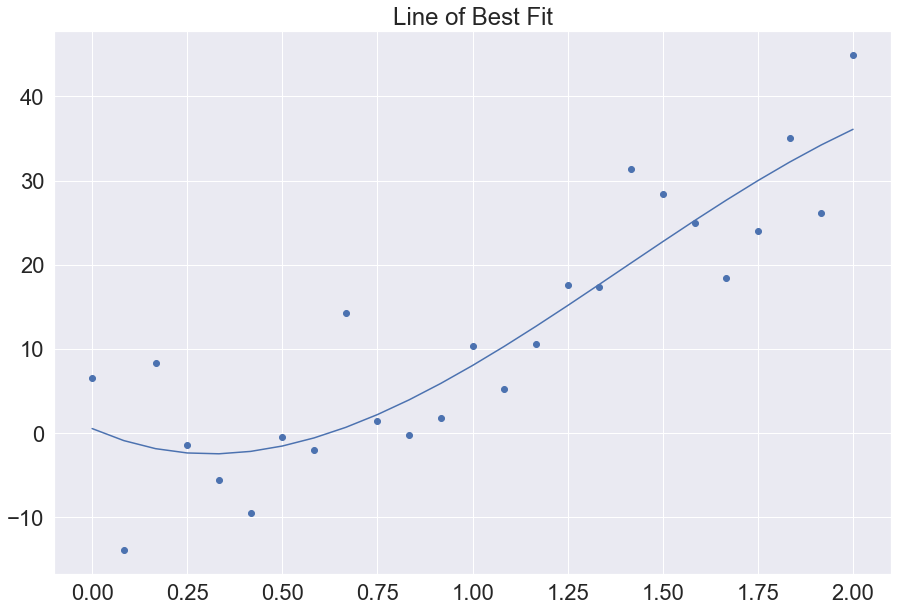

AIC: 105.141
BIC: 112.454
r2: 0.8044825722048081
MSE: 41.4975339613094


<Figure size 432x288 with 0 Axes>

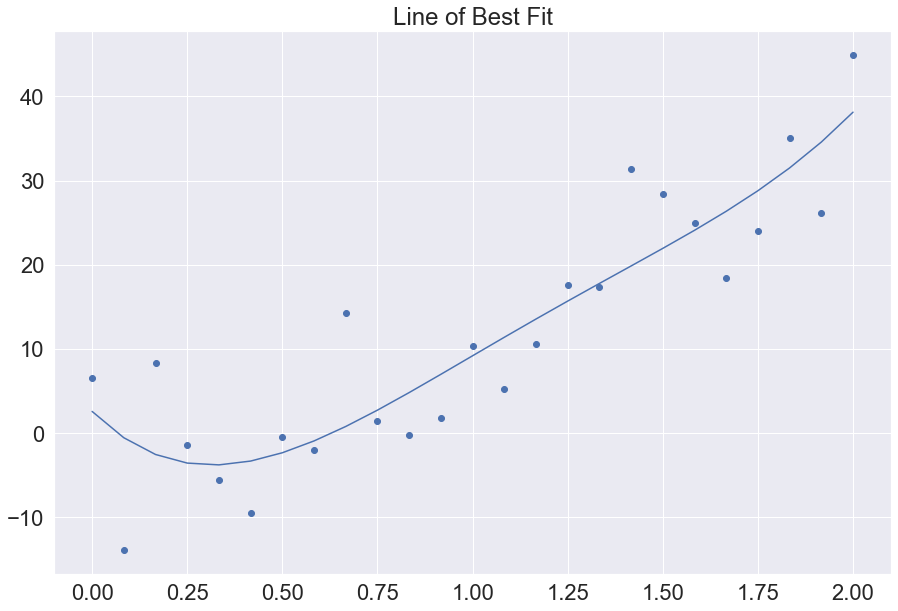

AIC: 106.355
BIC: 114.887
r2: 0.8105364693156936
MSE: 40.2126265042596


<Figure size 432x288 with 0 Axes>

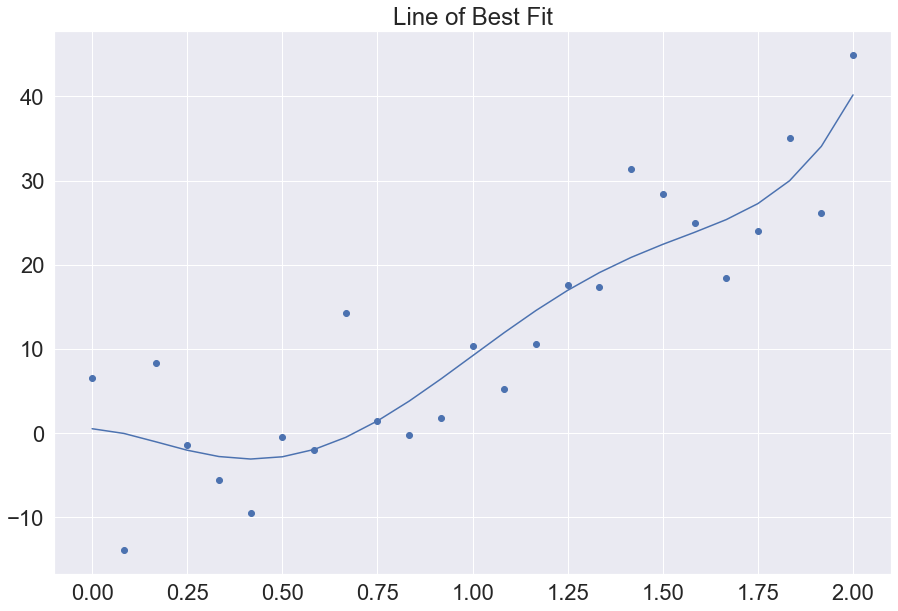

AIC: 106.321
BIC: 117.291
r2: 0.8387678271709932
MSE: 34.220670980983286


<Figure size 432x288 with 0 Axes>

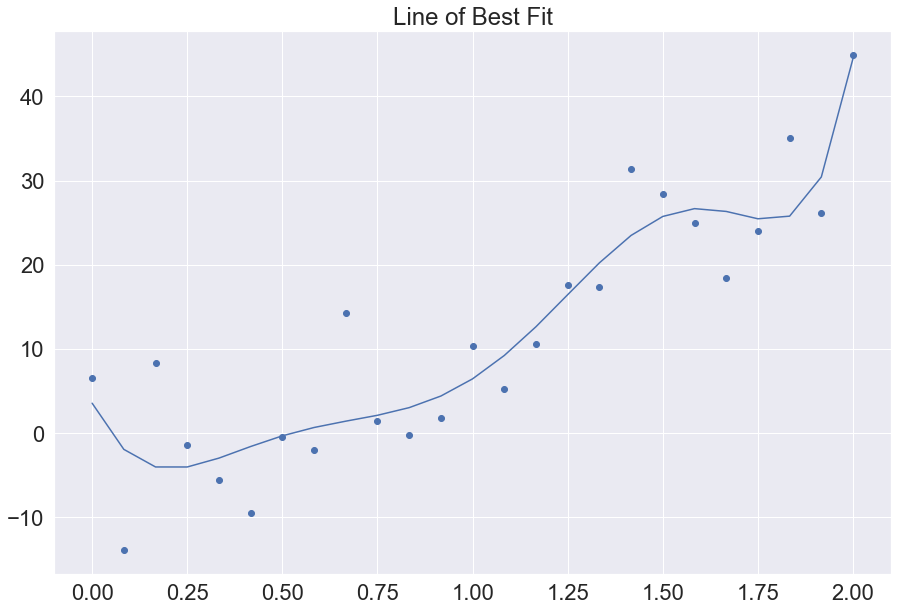

AIC: 98.597
BIC: 113.223
r2: 0.9068803429218634
MSE: 19.76415184897644


<Figure size 432x288 with 0 Axes>

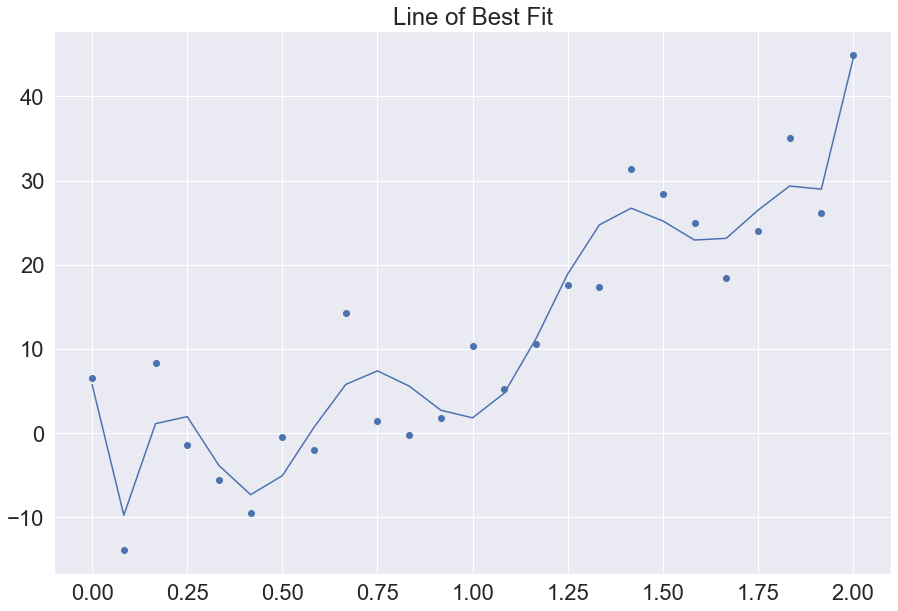

AIC: 85.983
BIC: 106.704
r2: 0.9623117898856137
MSE: 7.999122107932983


<Figure size 432x288 with 0 Axes>

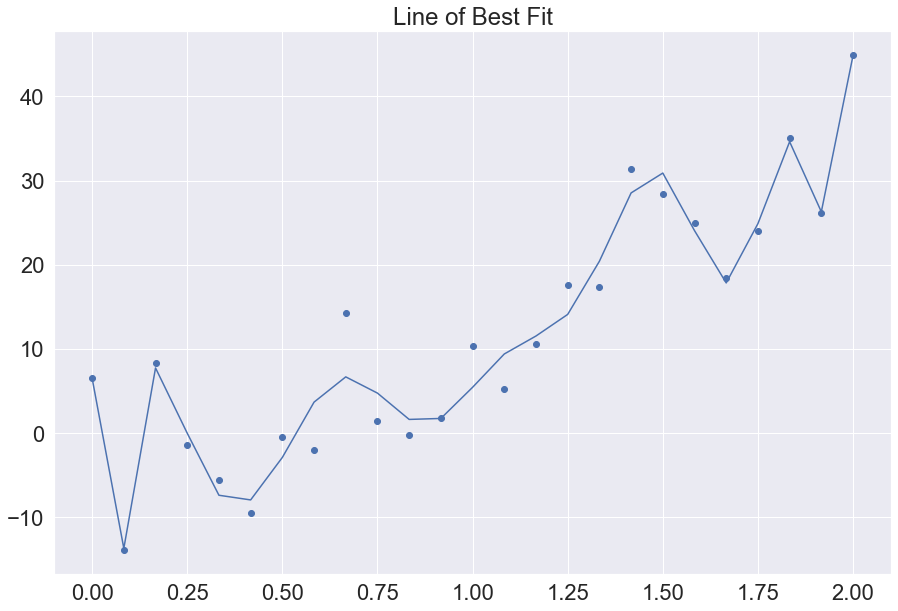

AIC: 100.924
BIC: 139.928
r2: 0.9793655926767553
MSE: 4.3795431861184655


<Figure size 432x288 with 0 Axes>

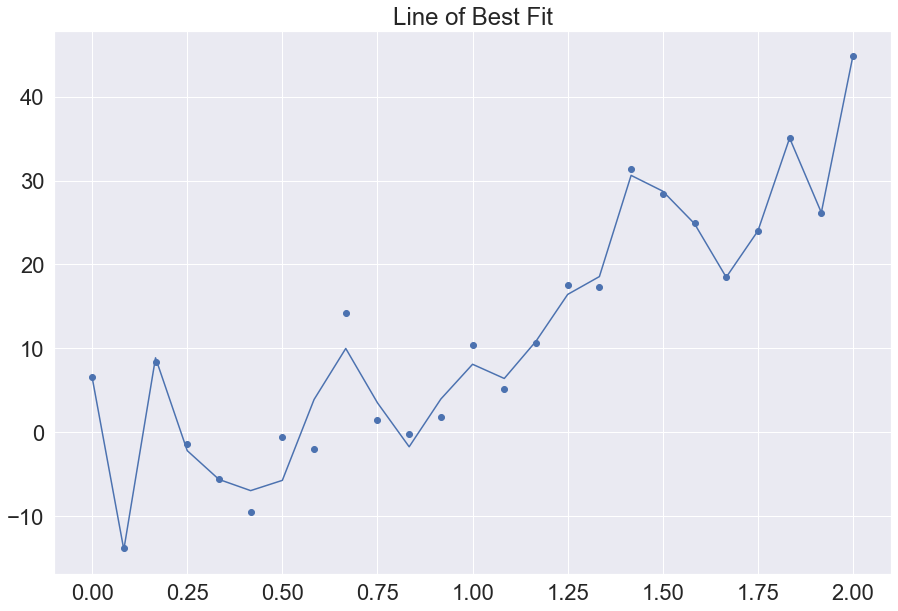

<Figure size 432x288 with 0 Axes>

In [196]:
#model output
for i in range(len(degree)):
    train_model = train_polynomial_model(x, y, degree[i])
    stats = print_stats(y, train_model)
    plots = plot_model(x, y, train_model)

## Comparing AIC and BIC

In [197]:
df = pd.DataFrame(list(zip(num_params_list, aic_list, bic_list)), columns =['Number of Parameters', 'AIC', 'BIC'])
print(df)

   Number of Parameters         AIC         BIC
0                     2  137.943494  140.381246
1                     3  106.474156  110.130784
2                     4  102.984619  107.860122
3                     5  103.752669  109.847049
4                     6  105.140850  112.454105
5                     7  106.354526  114.886657
6                     9  106.320747  117.290629
7                    12   98.596745  113.223255
8                    17   85.983295  106.704184
9                    32  100.923611  139.927637


In [198]:
# aic = pd.DataFrame(list(zip(num_params_list, aic_test)), columns =[ 'Number of Parameters', 'AIC'])
# print(aic)

In [199]:
# sns.set(font_scale=2)
# figure = sns.relplot(data=aic, x="Number of Parameters", y="AIC", kind='line', marker='o')
# plt.title('Degree of Heterogeneity against Model Quality ')
# figure.fig.set_size_inches(15,10)
# figure.savefig("output.png")

In [200]:
df2 = pd.melt(df, 'Number of Parameters', var_name='Measure', 
              value_name='Value')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


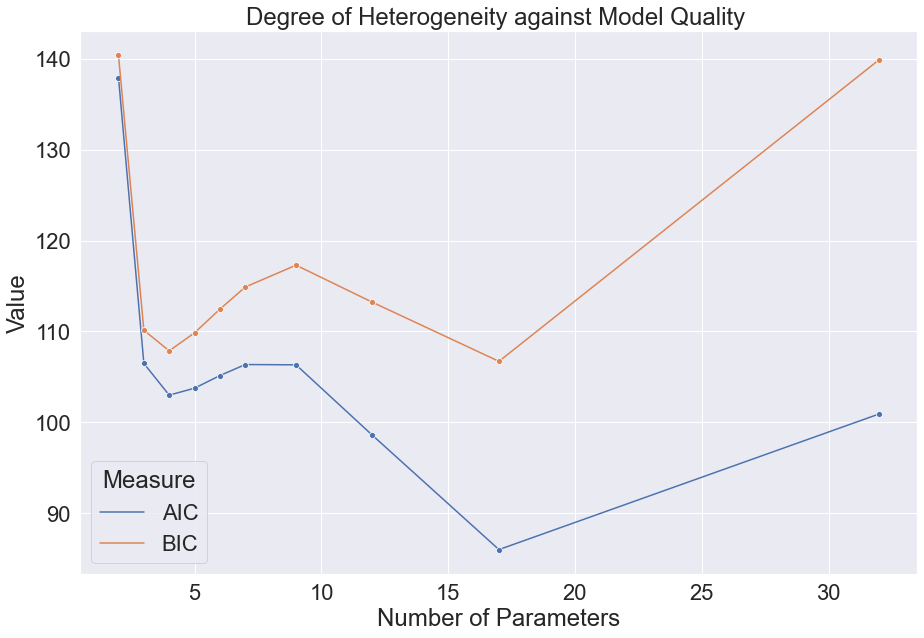

In [201]:
plt.figure(figsize=(15,10))
sns.lineplot('Number of Parameters', 'Value', marker='o', hue='Measure', 
             data=df2)
plt.title('Degree of Heterogeneity against Model Quality ')
plt.savefig("comp.png")

In [ ]:
# sns.set(font_scale=2)
# figure = sns.relplot(data=df, x="Number of Parameters", y="AIC", kind='line')
# plt.title('Degree of Heterogeneity against Model Quality ')
# figure.fig.set_size_inches(15,10)
# figure.savefig("AIC.png")

In [ ]:
# sns.set(font_scale=2)
# figure = sns.relplot(data=df, x="Number of Parameters", y="BIC", kind='line')
# plt.title('Degree of Heterogeneity against Model Quality ')
# figure.fig.set_size_inches(15,10)
# figure.savefig("bic.png")

# Previous Model (First attempt)

In [ ]:
#polynomial 3rd order
# y = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + e

# plt.figure(figsize=(10,8))
# plt.scatter(x, y)

In [212]:
#fitting linear regression
# lin_reg = LinearRegression()
# lin_reg.fit(x.reshape(-1, 1), y)
# model_pred = lin_reg.predict(x.reshape(-1, 1))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, model_pred);
# print (model_pred)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, model_pred)))
# print('MSE: {}'.format(mse(y, model_pred)))

In [14]:
# polynomial_features= PolynomialFeatures(degree=2)
# x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
# lin_reg.fit(x_poly, y)
# y_poly_pred = lin_reg.predict(x_poly)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
# print('MSE: {}'.format(mse(y, y_poly_pred)))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, y_poly_pred);

In [17]:
# polynomial_features= PolynomialFeatures(degree=3)
# x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
# lin_reg.fit(x_poly, y)
# y_poly_pred = lin_reg.predict(x_poly)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
# print('MSE: {}'.format(mse(y, y_poly_pred)))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, y_poly_pred);

In [20]:
# polynomial_features= PolynomialFeatures(degree=4)
# x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
# lin_reg.fit(x_poly, y)
# y_poly_pred = lin_reg.predict(x_poly)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
# print('MSE: {}'.format(mse(y, y_poly_pred)))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, y_poly_pred);